In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import pandas as pd 
import torch
import torch.optim as opt 

from neverstop.models import FastFM
from neverstop.logging import setup_logger
from neverstop.training import parse_movie_dataset, run_movies_normal, run_movies_ness
from neverstop.plotting import read_grid_data, plot_losses

In [6]:
! rm grid.json

In [7]:
fp = "/Users/vincent/Development/notebooks/ml-100k/u.data"
logger = setup_logger("grid.json")
n_iter = 100

In [8]:
for i in range(3):
    df, user_cat, item_cat, ratings = parse_movie_dataset(filepath=fp)
    fastfm_model = FastFM(df)
    sgd = opt.SGD(fastfm_model.parameters(), lr=0.01)
    step_sheduler = opt.lr_scheduler.MultiStepLR(sgd, milestones=[100, 200, 500], gamma=0.1)

    run_movies_normal(filepath=fp, 
                      model=fastfm_model, 
                      optimizer=sgd, 
                      scheduler=step_sheduler, 
                      iterations=n_iter, 
                      logger=logger)

mse=1.308 mae=0.9402: 100%|██████████| 100/100 [00:43<00:00,  2.29it/s]


In [9]:
for i in range(3):
    df, user_cat, item_cat, ratings = parse_movie_dataset(filepath=fp)
    fastfm_model = FastFM(df)
    sgd = opt.Adam(fastfm_model.parameters(), lr=0.01)
    step_sheduler = opt.lr_scheduler.MultiStepLR(sgd, milestones=[100, 200, 500], gamma=0.1)
    run_movies_normal(filepath=fp, 
                      model=fastfm_model, 
                      optimizer=sgd, 
                      scheduler=step_sheduler, 
                      iterations=n_iter, 
                      logger=logger)

mse=0.8487 mae=0.7307: 100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


In [14]:
for i in range(3):
    df, user_cat, item_cat, ratings = parse_movie_dataset(filepath=fp)
    fastfm_model = FastFM(df)
    sgd = opt.SGD(fastfm_model.parameters(), lr=0.01)
    step_sheduler = opt.lr_scheduler.MultiStepLR(sgd, milestones=[100, 200, 500], gamma=0.1)
    run_movies_ness(filepath=fp, 
                    model=fastfm_model, 
                    optimizer=sgd, 
                    scheduler=step_sheduler, 
                    iterations=n_iter, 
                    logger=logger)

mse=1.279 mae=0.9442: 100%|██████████| 100/100 [00:05<00:00, 18.30it/s]


In [19]:
for i in range(3):
    df, user_cat, item_cat, ratings = parse_movie_dataset(filepath=fp)
    fastfm_model = FastFM(df)
    sgd = opt.SGD(fastfm_model.parameters(), lr=0.01)
    step_sheduler = opt.lr_scheduler.MultiStepLR(sgd, milestones=[100, 200, 500], gamma=0.1)
    run_movies_ness(filepath=fp, 
                    model=fastfm_model, 
                    optimizer=sgd, 
                    scheduler=step_sheduler, 
                    iterations=n_iter, 
                    logger=logger)

mse=1.314 mae=0.9487: 100%|██████████| 100/100 [00:06<00:00, 15.89it/s]


In [21]:
read_grid_data().shape

(181, 10)

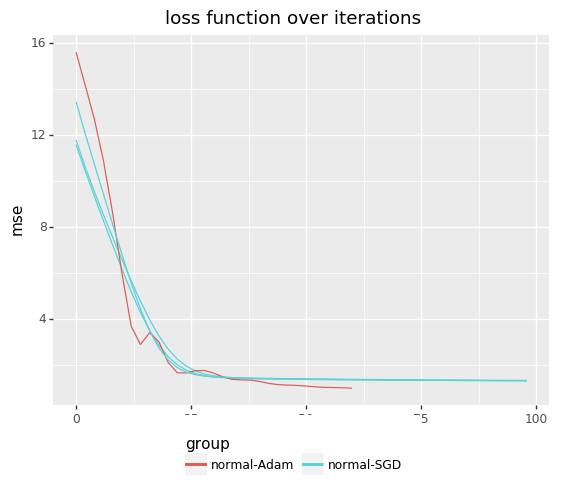

<ggplot: (-9223372036532101081)>

In [22]:
plot_losses(read_grid_data())